# Regularization

## 主题和背景
The most direct way to prevent overfitting is to increase the size of the training set indefinitely, so that the samples of the training set are as close as possible to the real data distribution, but it is not realistic to do so. First, we have no way of knowing what the real distribution of the data is Second, to increase the data set is a very labor-intensive method and can not guarantee the effect. So the more common method is regularization.
>最直接防止过拟合的方法是无限增大训练集的大小，让训练集样本与真实数据分布尽可能接近，但这么做实在是不太现实，一是我们根本无从知晓数据真实分布是什么样，二来增加数据集是一个很花费人力物力的而且不能保证效果的方法。所以比较常用的办法是正则化。

Regularization is a method commonly used in machine learning to prevent overfitting. In the process of implementing machine learning, due to too many features or other reasons, the model will be prone to overfitting, and regularization aims to prevent overfitting of the model by reducing the value of $θ$.
>正则化（regularization）是机器学习中常用的一种防止过拟合（overfitting）的方法。在实施机器学习的过程中，由于特征太多或是其它原因，模型会容易出现过拟合的情况，而正则化旨在通过减小 $θ$ 的值防止模型的过拟合。

Strategies designed to reduce test errors (possibly at the expense of increasing training errors).

## 术语
* overfitting:是指学习时选择的模型所包含的参数过多，以至于出现这一模型对已知数据预测的很好，但对未知数据预测的很差的现象。过拟合的是由数据和模型两方面原因共同造成的。
* regularization parameter:正则化参数λ，λ越大，模型就会越倾向欠拟合；λ 越小，模型则会越倾向过拟合。
* 假设空间:模型可以看成是一个高维函数，不同参数对应的所有可能得到的模型称之为假设空间。

* 0范数：向量中非零元素的个数。
* 1范数：为绝对值之和。1范数和0范数可以实现稀疏，1因具有比L0更好的优化求解特性而被广泛应用。
* 2范数：就是通常意义上的模，L2范数是指向量各元素的平方和然后求平方根。我们让L2范数的正则项||W||2最小，可以使得W的每个元素都很小，都接近于0，但与L1范数不同，它不会让它等于0，而是接近于0。


## 常见的正则化策略
### 参数范数惩罚
参数范数惩罚通过对目标函数J添加一个参数范数惩罚Ω(θ)，限制模型的学习能力，我们常说的L1，L2正则化就是属于这种方法。我们将正则化欧的目标函数记为$J~：J~(θ;X,y)=J(θ;X,y)+αΩ(θ)$

其中α≥0是权衡范数惩罚项Ω和标准目标函数J(X;θ)相对贡献的超参数，通过调整α的大小，可以获得不同的参数选择偏好。
需要注意的一点是，参数包括模型中每一层仿射变换的权重和偏置，我们通常只对权重做惩罚，而不对偏置做正则惩罚。因为精确拟合偏置所需的数据通常比权重少的多，正则化偏置参数可能会导致明显的欠拟合。 

## 逻辑 公式推导过程
### L1正则化
>The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients.
Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is: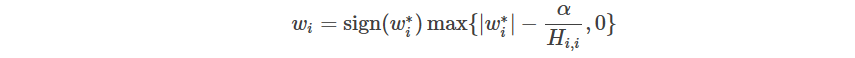
The lasso estimate thus solves the minimization of the least-squares penalty with$α∥w∥1$
added, where $α$ is a constant and $∥w∥1$
is the
1-norm of the coefficient vector.

也被称为Lasso回归。形式：$J~(θ;X,y)=J(θ;X,y)+α∥w∥1$

对应的梯度为：$∇wJ~(θ;X,y)=∇wJ(θ;X,y)+αsign(w)$

将L1正则化目标函数的二次近似分解成关于参数的求和：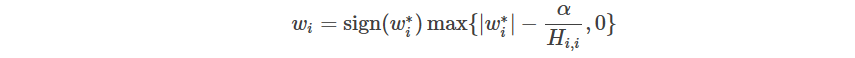
下面形式的解析解可以最小化这近似代价函数：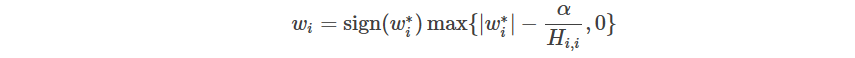
对每个i，考虑w∗i>0的情况，会有两种可能的结果：
* 当w∗i≤αHi,i时，正则化中的wi最优值是0；
* 当w∗i>αHi,i时，正则化不会将wi的最优值推至0，而是在那个方向上移动αHi,i 的距离。 

### L2正则化
>Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.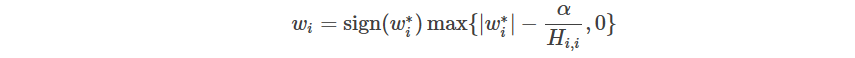The complexity parameter $α≥0$ controls the amount of shrinkage: the larger the value of α, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

>Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

也被称为权重衰减或岭回归，通过向目标函数添加一个L2范数平方项，使权重更加接近原点。形式如：$J~(θ;X,y)=J(θ;X,y)+α12∥w∥22$

分析一下L2正则化给优化过程带来的效果。假设没有偏置参数，因此θ就是w，模型的总目标函数为：
$J~(w;X,y)=α2wTw+J(w;X,y)$

与之对应的梯度为
$∇wJ~(w;X,y)=αw+∇wJ(w;X,y)$

使用单步梯度下降更新权重，ϵ≥0为学习率：
$w←w−ϵ(αw+∇wJ(w;X,y))$

换种写法就是
$w←(1−ϵα)w−ϵ∇wJ(w;X,y)$

和没有L2正则化项的权重更新方式对比
$w←w−ϵ∇wJ(w;X,y)$

在加入L2正则项之后，每次更新梯度之前，都会先对权重向量进行收缩

L2正则为什么能过很好的防止过拟合？

第一，通过引入L2正则，使模型参数偏好比较小的值，这其实也限制的函数空间的大小，有针对的减小了模型容量。一般来说，大的参数值对应于波动剧烈的函数，小的参数值对应于比较平缓的参数，因为小参数对于输入的改变不会那么敏感。发生过拟合往往是因为顾及到了所有样本点，所以此时的函数波动会比较大

第二，L2正则化能让学习算法“感知”到具有较高方差的输入x，因此与输出目标的协方差较小的特征的权重将会收缩。因此L2正则化总是倾向于对那些训练集样本共用的特征产生较大的响应，而减小对个别样本独有的特征产生的响应。因此L2正则有抑制那些“独有特征”的作用，这在一定程度上也减小了过拟合的风险。

L2正则化可通过假设权重w的先验分布为高斯分布，由最大后验概率估计导出。

## 实例
正则化的两种方法（代码练习）

### Linear Regression Example
The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

**LinearRegression** will take in its fit method arrays X, y and will store the coefficients of the linear model in its coef_ member:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


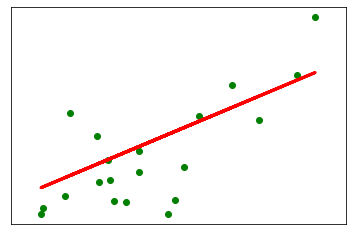

In [3]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='green')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Plot Ridge coefficients as a function of the regularization
This example shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

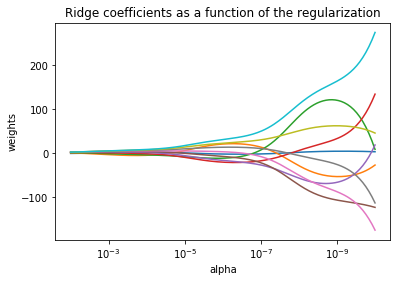

In [6]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

### Lasso and Elastic Net for Sparse Signals

Estimates Lasso and Elastic-Net regression models on a manually generated sparse signal corrupted with an additive noise. Estimated coefficients are compared with the ground-truth.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [8]:
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [9]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.658064


In [10]:
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.642515


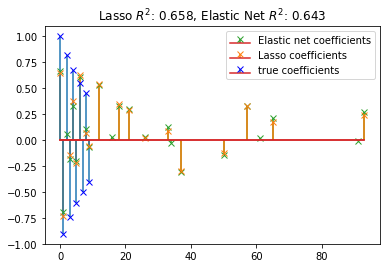

In [11]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx', use_line_collection=True)

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()